In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import random
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

In [2]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [3]:
dir = '/Users/mattgarcia/Desktop/data/train'
birds = sorted(os.listdir(dir))
birds = birds[1:]
#get rid of this to make the data equal length
birds = [bird for bird in birds if not bird.startswith('.ipynb_checkpoints')]
print(birds)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [8]:
print(len(birds))

526


In [4]:
import shutil

# Define the path to the .ipynb_checkpoints directory
checkpoints_dir = '/Users/mattgarcia/Desktop/data/train/.ipynb_checkpoints'

# Check if the directory exists before attempting to remove it
if os.path.exists(checkpoints_dir):
    # Remove the directory and its contents recursively
    shutil.rmtree(checkpoints_dir)
    print(f".ipynb_checkpoints directory and its contents removed successfully.")
else:
    print(f".ipynb_checkpoints directory does not exist.")


.ipynb_checkpoints directory does not exist.


In [14]:
#function automatically loads images from directories and generates labeled datasets
#TensorFlow infers class labels from the directory structure.
train = tf.keras.utils.image_dataset_from_directory('/Users/mattgarcia/Desktop/data/train', label_mode='categorical', labels='inferred')

val = tf.keras.utils.image_dataset_from_directory('/Users/mattgarcia/Desktop/data/valid', label_mode='categorical', labels='inferred')

test = tf.keras.utils.image_dataset_from_directory('/Users/mattgarcia/Desktop/data/test', label_mode='categorical', labels='inferred')

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [15]:
#Scale the data
#y remains unchanged because it is our labels
#try with 128 x 128 to increase speed while we optimize the model
train = train.map(lambda x, y: (tf.image.resize(x, [128, 128]), y))
val = val.map(lambda x, y: (tf.image.resize(x, [128, 128]), y))
test = test.map(lambda x, y: (tf.image.resize(x, [128, 128]), y))
# train = train.map(lambda x,y: (x/255, y))
# val = val.map(lambda x,y: (x/255, y))
# test = test.map(lambda x,y: (x/255, y))

In [19]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(525, activation='softmax'))


model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 16)       

In [20]:
hist = model.fit(train, epochs=15, validation_data=val)

Epoch 1/15
2645/2645 [==============================] - 129s 49ms/step - loss: 6.1331 - accuracy: 0.0149 - val_loss: 5.6326 - val_accuracy: 0.0495
Epoch 2/15
2645/2645 [==============================] - 124s 47ms/step - loss: 4.8253 - accuracy: 0.1199 - val_loss: 3.9455 - val_accuracy: 0.2270
Epoch 3/15
2645/2645 [==============================] - 121s 46ms/step - loss: 3.5926 - accuracy: 0.2793 - val_loss: 3.4126 - val_accuracy: 0.3150
Epoch 4/15
2645/2645 [==============================] - 119s 45ms/step - loss: 2.9494 - accuracy: 0.3794 - val_loss: 3.2550 - val_accuracy: 0.3467
Epoch 5/15
2645/2645 [==============================] - 119s 45ms/step - loss: 2.5071 - accuracy: 0.4532 - val_loss: 3.3247 - val_accuracy: 0.3623
Epoch 6/15
2645/2645 [==============================] - 120s 45ms/step - loss: 2.1888 - accuracy: 0.5094 - val_loss: 3.4958 - val_accuracy: 0.3691
Epoch 7/15
2645/2645 [==============================] - 120s 45ms/step - loss: 1.9296 - accuracy: 0.5549 - val_loss: 3

In [21]:
from tensorflow.keras.layers import Dropout

updated_model = Sequential()
updated_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
updated_model.add(MaxPooling2D())
updated_model.add(Conv2D(32, (3,3), 1, activation='relu'))
updated_model.add(MaxPooling2D())
updated_model.add(Conv2D(16, (3,3), 1, activation='relu'))
updated_model.add(MaxPooling2D())
updated_model.add(Flatten())
updated_model.add(Dense(128, activation='relu'))
updated_model.add(Dropout(0.5))  # Adding dropout regularization
updated_model.add(Dense(525, activation='softmax'))

updated_model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

updated_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 16)       

In [22]:
hist2 = updated_model.fit(train, epochs=15, validation_data=val)
#not that good of a try

Epoch 1/15
2645/2645 [==============================] - 131s 49ms/step - loss: 6.2772 - accuracy: 0.0027 - val_loss: 6.2653 - val_accuracy: 0.0019
Epoch 2/15
2645/2645 [==============================] - 129s 49ms/step - loss: 6.2585 - accuracy: 0.0031 - val_loss: 6.2675 - val_accuracy: 0.0019
Epoch 3/15
2645/2645 [==============================] - 127s 48ms/step - loss: 6.2577 - accuracy: 0.0031 - val_loss: 6.2691 - val_accuracy: 0.0019
Epoch 4/15
2645/2645 [==============================] - 131s 49ms/step - loss: 6.2574 - accuracy: 0.0031 - val_loss: 6.2701 - val_accuracy: 0.0019
Epoch 5/15
2645/2645 [==============================] - 132s 50ms/step - loss: 6.2574 - accuracy: 0.0031 - val_loss: 6.2706 - val_accuracy: 0.0019
Epoch 6/15
1959/2645 [=====================>........] - ETA: 34s - loss: 6.2570 - accuracy: 0.0031

KeyboardInterrupt: 

In [23]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
third_model = Sequential()

# Convolutional layers
third_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128,128,3)))
third_model.add(BatchNormalization())  # Add BatchNormalization layer
third_model.add(MaxPooling2D())
third_model.add(Conv2D(32, (3,3), 1, activation='relu'))
third_model.add(BatchNormalization())  # Add BatchNormalization layer
third_model.add(MaxPooling2D())
third_model.add(Conv2D(16, (3,3), 1, activation='relu'))
third_model.add(BatchNormalization())  # Add BatchNormalization layer
third_model.add(MaxPooling2D())

# Flatten and Dense layers
third_model.add(Flatten())
third_model.add(Dense(128, activation='relu'))
third_model.add(BatchNormalization())  # Add BatchNormalization layer
third_model.add(Dropout(0.5))
third_model.add(Dense(525, activation='softmax'))

# Compile the model
third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
third_model.summary()

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with Early Stopping
hist3 = third_model.fit(train, epochs=15, validation_data=val, callbacks=[early_stopping])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                                                
                                                      

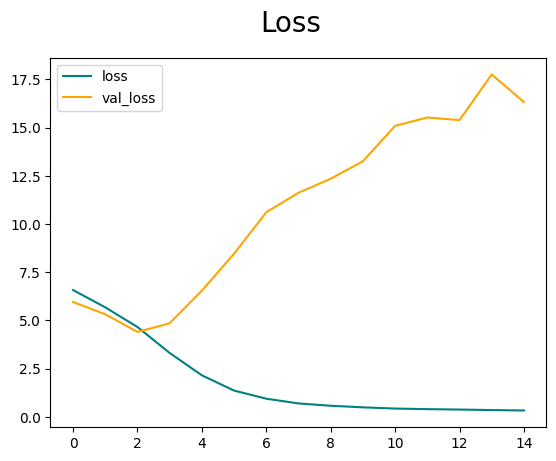

In [12]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
fig = plt.figure()
plt.plot(hist2.history['loss'], color='teal', label='loss')
plt.plot(hist2.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

NameError: name 'hist2' is not defined

<Figure size 640x480 with 0 Axes>

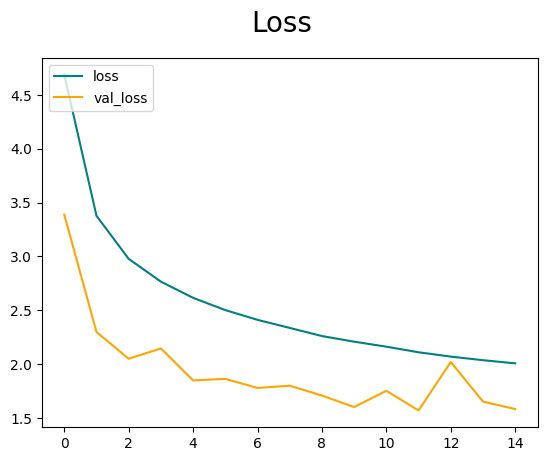

In [25]:
fig = plt.figure()
plt.plot(hist3.history['loss'], color='teal', label='loss')
plt.plot(hist3.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()